# Feature Selection from Mobile data using ExhaustiveFeatureSelector Exhaustive Method
Dataset: [https://raw.githubusercontent.com/subashgandyer/datasets/main/mobile_price_train.csv]

In [2]:
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/mobile_price_train.csv"

In [4]:
df = pd.read_csv(url)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

### Understand the data
- Find how many features?
- Find how many samples?
- What are the data types of each feature column?
- What do you think could be the most important feature(s)?
- Run some feature selection methods
- Is your intuition right?

### Import the necessary libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Read the mobile data

In [18]:
#data = pd.read_csv("data/mobile_price_train.csv")
data = df

### Split the dataset into X and y

In [21]:
X = data.iloc[:,0:20]
y = data.iloc[:,-1] 

### Sanity check

In [24]:
X.shape, y.shape

((2000, 20), (2000,))

### How many features

In [27]:
X.shape[1]

20

In [29]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

### Import the ExhaustiveFeatureSelector from mlxtend library

In [32]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

### Import the Logistic Regression model

In [35]:
from sklearn.linear_model import LogisticRegression

### Build a Logistic Regression model with lbfgs as solver and iterations = 500

In [38]:
lr = LogisticRegression(class_weight='balanced',
                        solver='lbfgs', 
                        random_state=42, 
                        n_jobs=-1, 
                        max_iter=500
)

### Build ExhaustiveFeatureSelector with Logistic Regression model and min and max features as 1 to 2

In [41]:
efs_lr = ExhaustiveFeatureSelector(lr, 
                                min_features=1, 
                                max_features=2,
                                scoring='accuracy',
                                print_progress=True,
                                cv=2
)

### Train the ExhaustiveFeatureSelector model

In [44]:
efs_lr = efs_lr.fit(X, y)

Features: 210/210

### Explore the best feature names from the model

In [47]:
efs_lr.best_feature_names_

('battery_power', 'ram')

### Best Score feature subset

In [50]:
efs_lr.best_score_

0.8225

### All subsets

In [53]:
efs_lr.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.315, 0.312]),
  'avg_score': 0.3135,
  'feature_names': ('battery_power',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.243, 0.249]),
  'avg_score': 0.246,
  'feature_names': ('blue',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.229, 0.243]),
  'avg_score': 0.236,
  'feature_names': ('clock_speed',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.24 , 0.246]),
  'avg_score': 0.243,
  'feature_names': ('dual_sim',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.259, 0.24 ]),
  'avg_score': 0.2495,
  'feature_names': ('fc',)},
 5: {'feature_idx': (5,),
  'cv_scores': array([0.251, 0.26 ]),
  'avg_score': 0.2555,
  'feature_names': ('four_g',)},
 6: {'feature_idx': (6,),
  'cv_scores': array([0.272, 0.271]),
  'avg_score': 0.2715,
  'feature_names': ('int_memory',)},
 7: {'feature_idx': (7,),
  'cv_scores': array([0.246, 0.26 ]),
  'avg_score': 0.253,
  'feature_names': ('m_dep',)},
 8: {'feature_idx': (8,),
  'cv_s

### Getting Metric dict

In [57]:
metric_dict = efs_lr.get_metric_dict()
metric_dict

{0: {'feature_idx': (0,),
  'cv_scores': array([0.315, 0.312]),
  'avg_score': 0.3135,
  'feature_names': ('battery_power',),
  'ci_bound': 0.006453979094544218,
  'std_dev': 0.0015000000000000013,
  'std_err': 0.0015000000000000013},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.243, 0.249]),
  'avg_score': 0.246,
  'feature_names': ('blue',),
  'ci_bound': 0.012907958189088437,
  'std_dev': 0.0030000000000000027,
  'std_err': 0.0030000000000000027},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.229, 0.243]),
  'avg_score': 0.236,
  'feature_names': ('clock_speed',),
  'ci_bound': 0.030118569107872955,
  'std_dev': 0.006999999999999992,
  'std_err': 0.0069999999999999915},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.24 , 0.246]),
  'avg_score': 0.243,
  'feature_names': ('dual_sim',),
  'ci_bound': 0.012907958189088437,
  'std_dev': 0.0030000000000000027,
  'std_err': 0.0030000000000000027},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.259, 0.24 ]),
  'avg_score': 0

### Plotting metric_dict

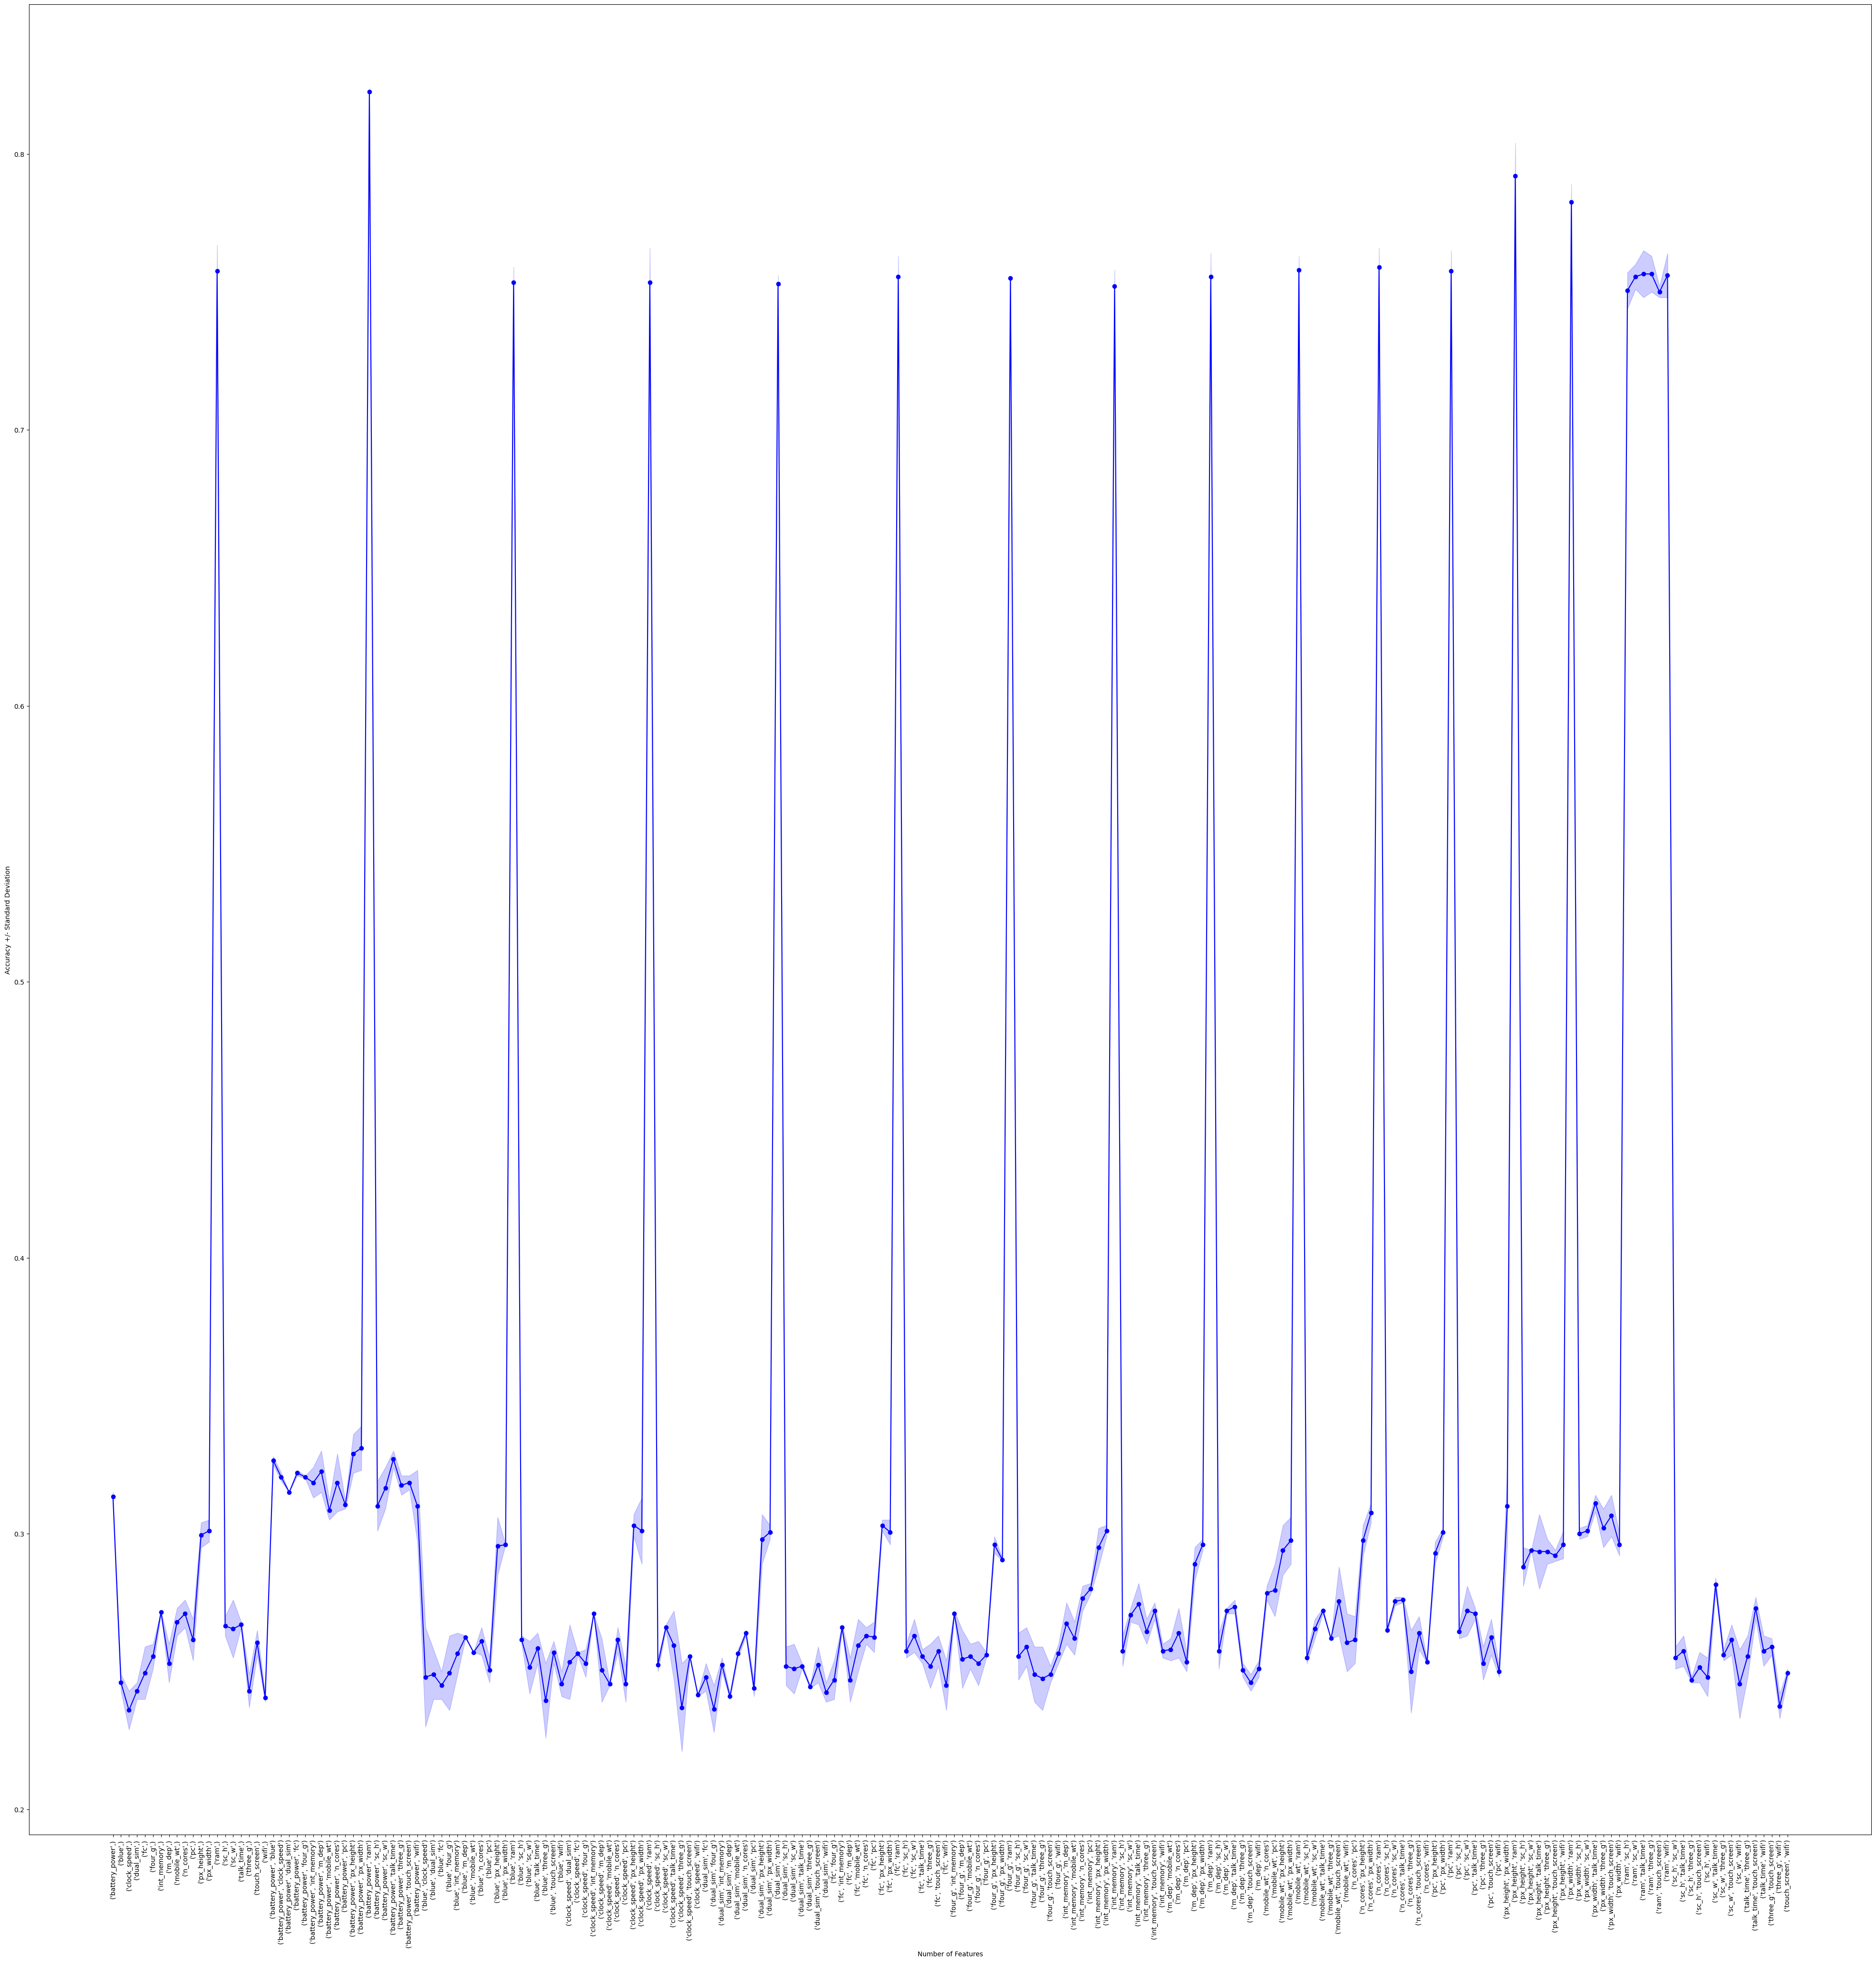

In [60]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(50,50))

k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='blue',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.show()

## Random Forest Classifier

### Import RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

### Build the Random Forest model

In [67]:
rf = RandomForestClassifier()

### Build the Exhaustive Feature Selector with Random Forest as the Learning Algorithm

In [70]:
efs_rf = ExhaustiveFeatureSelector(rf, 
                                min_features=1, 
                                max_features=2, 
                                scoring='accuracy', 
                                print_progress=True, 
                                cv=2
)

### Train the model

In [73]:
efs_rf = efs_rf.fit(X, y)

Features: 210/210

### Best features

In [76]:
efs_rf.best_feature_names_

('battery_power', 'ram')

### Best Score

In [79]:
efs_rf.best_score_

0.7975000000000001

### Collect all Metric dict with all the feature subsets

In [82]:
metric_dict = efs_lr.get_metric_dict()
metric_dict

{0: {'feature_idx': (0,),
  'cv_scores': array([0.315, 0.312]),
  'avg_score': 0.3135,
  'feature_names': ('battery_power',),
  'ci_bound': 0.006453979094544218,
  'std_dev': 0.0015000000000000013,
  'std_err': 0.0015000000000000013},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.243, 0.249]),
  'avg_score': 0.246,
  'feature_names': ('blue',),
  'ci_bound': 0.012907958189088437,
  'std_dev': 0.0030000000000000027,
  'std_err': 0.0030000000000000027},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.229, 0.243]),
  'avg_score': 0.236,
  'feature_names': ('clock_speed',),
  'ci_bound': 0.030118569107872955,
  'std_dev': 0.006999999999999992,
  'std_err': 0.0069999999999999915},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.24 , 0.246]),
  'avg_score': 0.243,
  'feature_names': ('dual_sim',),
  'ci_bound': 0.012907958189088437,
  'std_dev': 0.0030000000000000027,
  'std_err': 0.0030000000000000027},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.259, 0.24 ]),
  'avg_score': 0

### Plot metric dict with all subsets

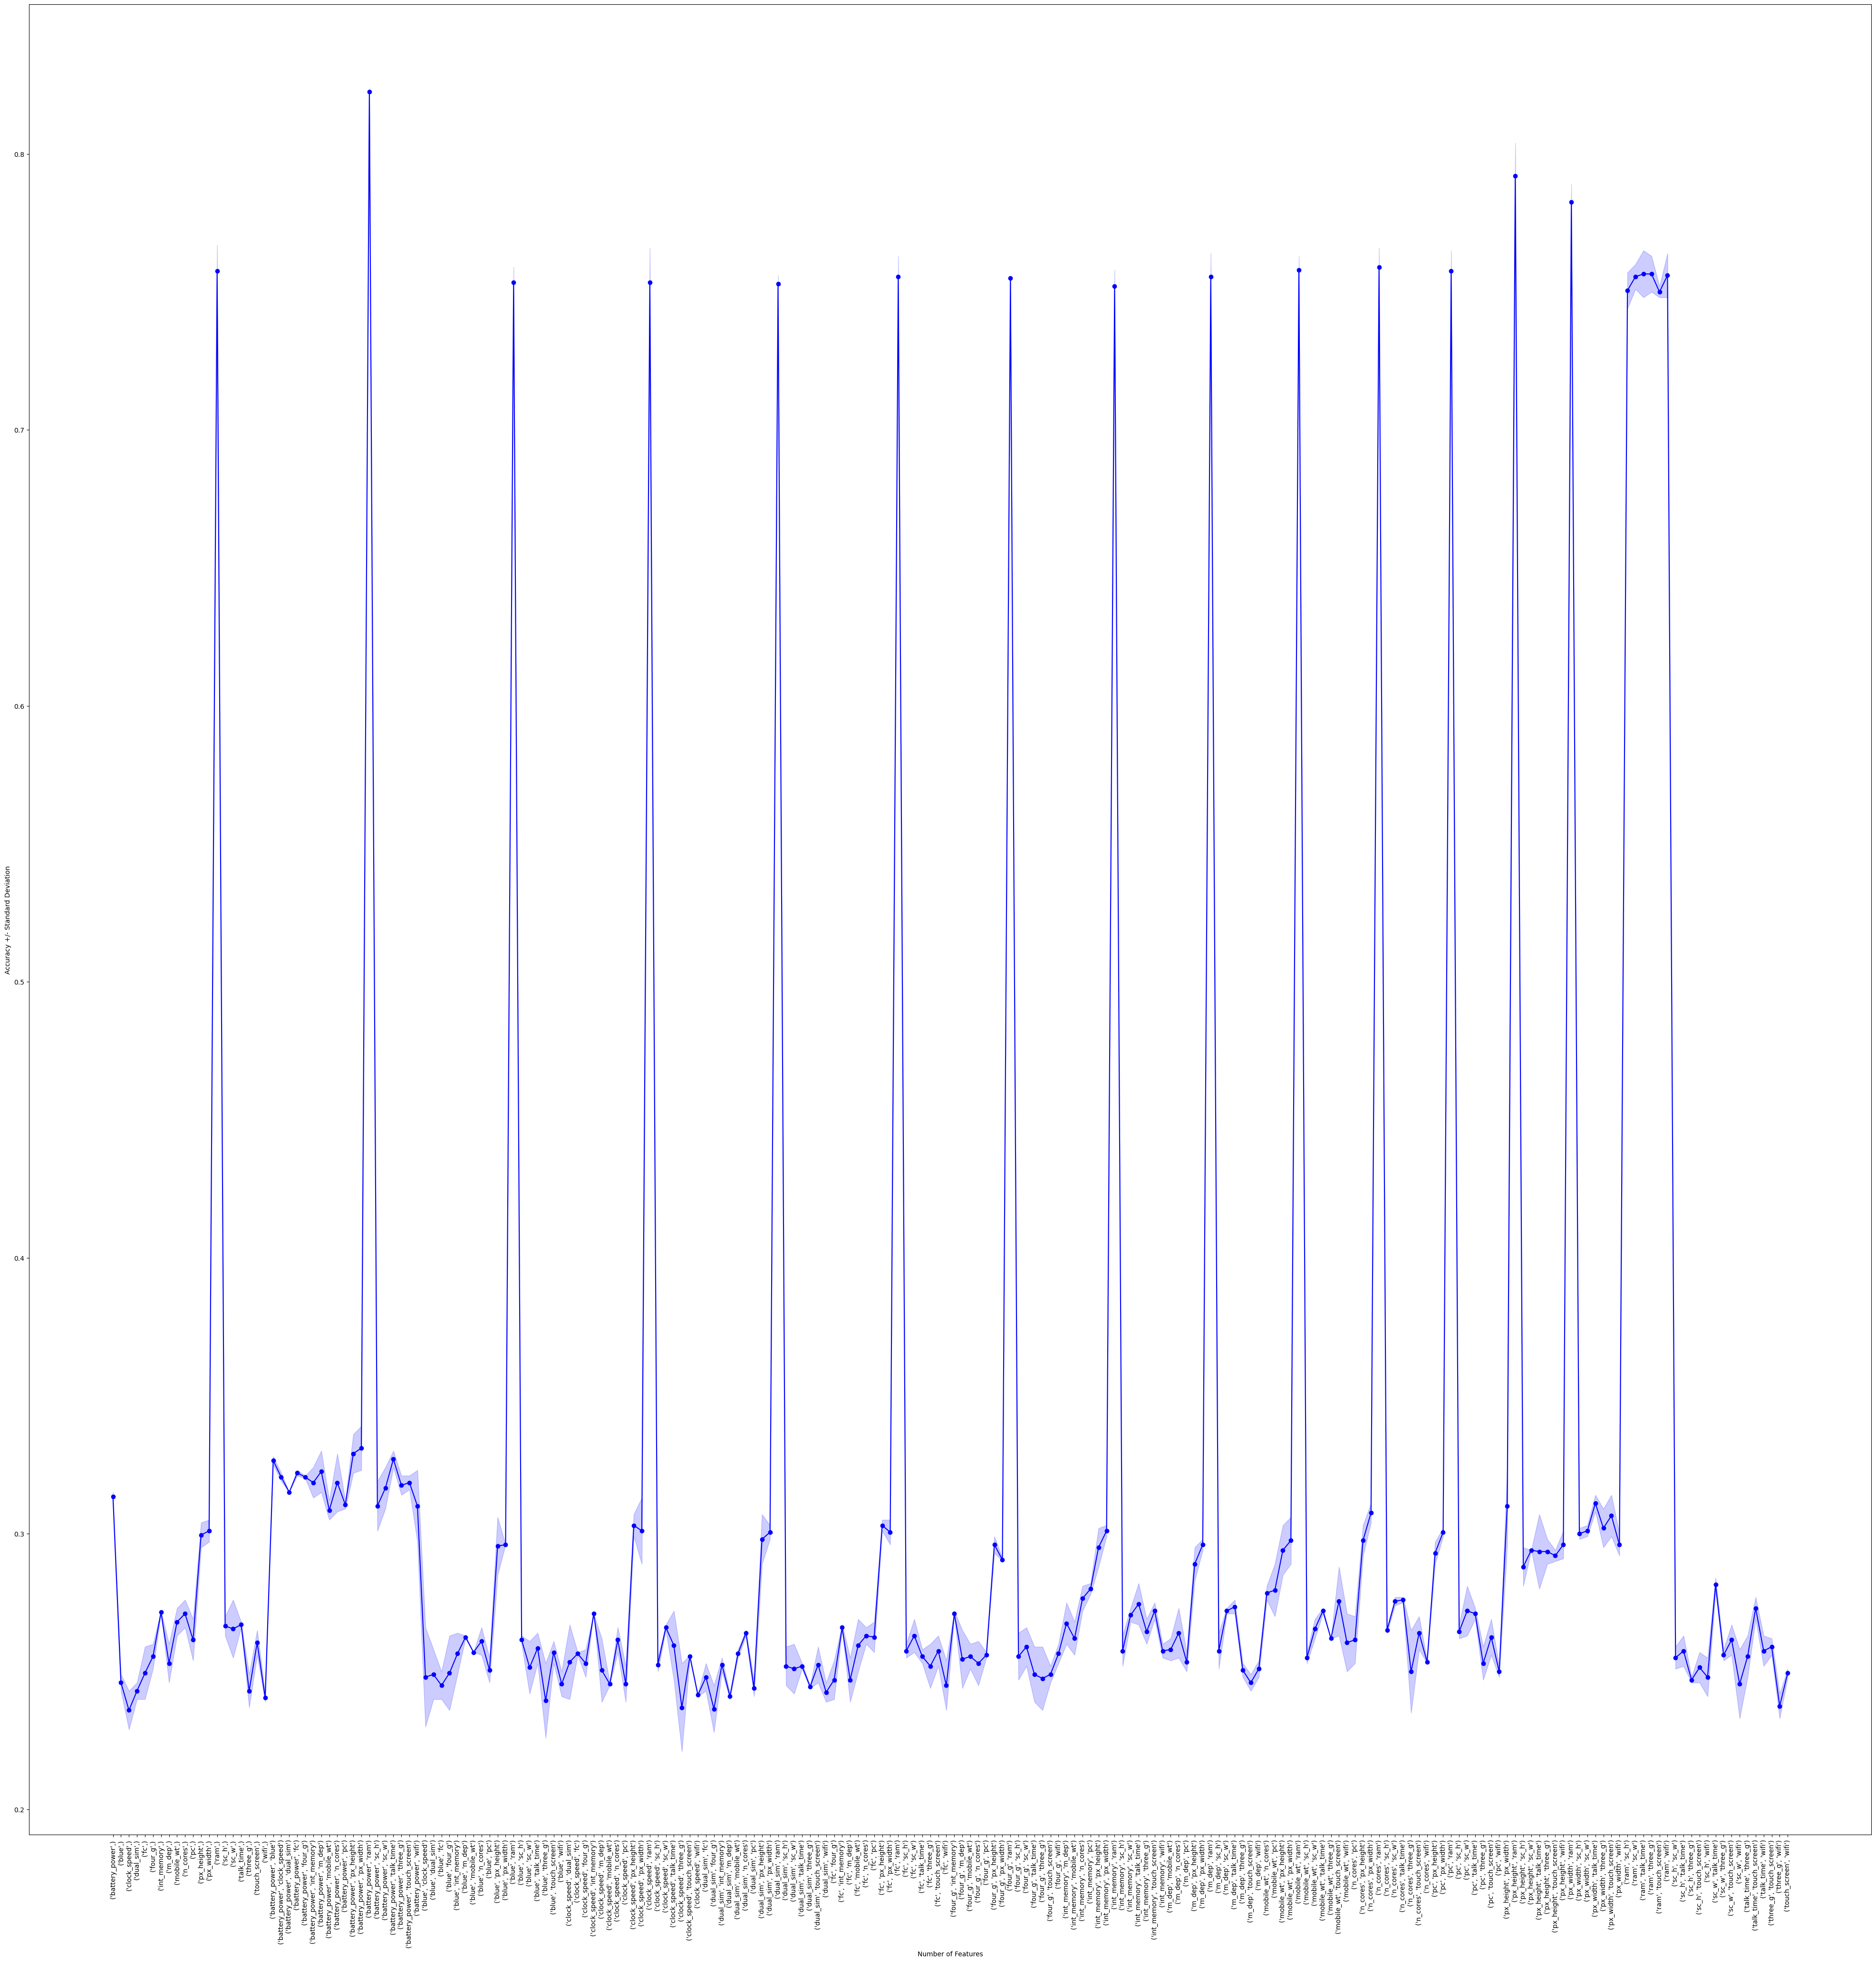

In [85]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(50,50))

k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='blue',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.show()

### Try KNN as the Learning algorithm

In [88]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier

### Choose KNN as your learning algorithm

In [91]:
knn = KNeighborsClassifier(n_neighbors=3)

### Build a ExhaustiveFeatureSelector model with KNN as learning algorithm

In [94]:
efs_knn = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5
)

### Train the model

In [33]:
efs_knn.fit(X, y)

Features: 210/210

ExhaustiveFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          max_features=2)

### Get the feature names

In [34]:
efs_knn.best_feature_names_

('battery_power', 'ram')

In [36]:
efs_knn.best_score_

0.7815

### Try some other learning algorithms you know of
- SVM
- Anything of your choice

### Summarize the list of features chosen by different algorithms
- Algorithm | Best Features | Best Accuracy

Example: 

- Logistic Regression | ['battery_power', 'ram']  | 0.823
- KNN | ???? | ????
- RF | ???? | ????
- Algorithms of your choice | ????? | ????